In [87]:
import os
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import  warnings; warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [61]:
dir_data = './'
train =  pd.read_csv(os.path.join(dir_data, 'train.csv'), header=None)
test =  pd.read_csv(os.path.join(dir_data, 'test.csv'), header=None)
train_label =  pd.read_csv(os.path.join(dir_data, 'trainLabels.csv'), header=None)

In [62]:
print(train.shape)
print(test.shape)
print(train_label.shape)
train.head()

(1000, 40)
(9000, 40)
(1000, 1)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [63]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [65]:
train_label.head()

,0
0,1
1,0
2,0
3,1
4,0


In [68]:
x_train,x_test,y_train,y_test=train_test_split(train,train_label,test_size=0.3,random_state=4)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 40), (300, 40), (700, 1), (300, 1))

In [83]:
#LogisticRegression
regr = LogisticRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(f'LogisticRegression: {accuracy_score(y_test, y_pred)}')

#DecisionTree
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f'DecisionTreeClassifier: {accuracy_score(y_test, y_pred)}')

#Naive Bayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f'GaussianNB: {accuracy_score(y_test, y_pred)}')

LogisticRegression: 0.8333333333333334
DecisionTreeClassifier: 0.7766666666666666
RandomForestClassifier: 0.9033333333333333
GaussianNB: 0.8466666666666667


In [94]:
#RandomForest
clf = RandomForestClassifier(random_state=10)
n_estimators = [20, 30, 60, 90, 120, 140, 160, 200] 
max_depth = [1 , 7, 10, 20, 40]
min_samples_split= [5, 10, 17, 20]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
grid_result = grid_search.fit(x_train, y_train)
y_pred=grid_result.predict(x_test)

print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Accuracy: 0.854286 using {'max_depth': 10, 'min_samples_split': 17, 'n_estimators': 20}


In [80]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.mixture import GaussianMixture

x_all = np.r_[train,test]
print('x_all shape :',x_all.shape)

# USING THE GAUSSIAN MIXTURE MODEL 
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
gmm_train = best_gmm.predict_proba(train)
gmm_test = best_gmm.predict_proba(test)

x_all shape : (10000, 40)


將Gaussian Mixture Model重新將數據集聚類的結果，再fit回 RandomForest

In [98]:
#RandomForest
clf = RandomForestClassifier(random_state=10)
n_estimators = [20, 30, 60, 90, 120, 140, 160, 200] 
max_depth = [1 , 7, 10, 20, 40]
min_samples_split= [5, 10, 17, 20]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
grid_result = grid_search.fit(gmm_train, train_label)
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Accuracy: 0.996000 using {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 20}


In [110]:
y_pred=grid_result.predict(gmm_test)
submission = { 'Id': np.arange(1, y_pred.shape[0]+1),
             'Solution': y_pred}
submission=pd.DataFrame(submission)
submission.to_csv('RandomForest_submission.csv',index=False)

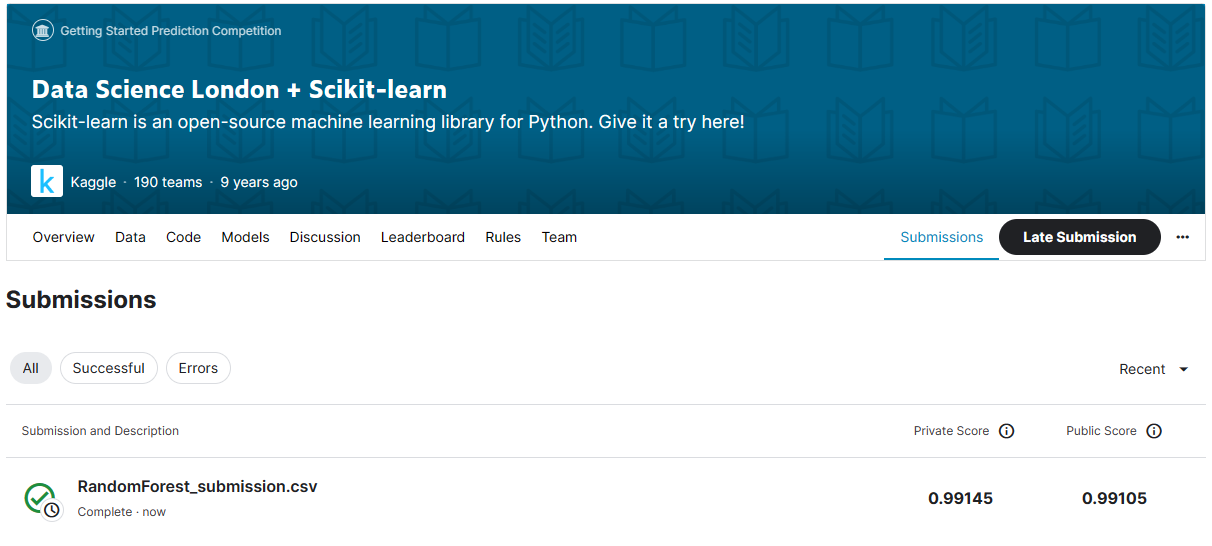

In [1]:
from IPython import display
display.Image("Day_048_HW_Kaggle.png")